### The goal is to predict the car model or body style that a person is likely to choose based on their gender, annual income, the car's type, engine, and price range
### Another goal might be to predict how much someone would be likely to pay for their car based on their gender, annual income, the car's type, and its engine

### 1. Get data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

filepath = '../data/car_sales.csv'

car = pd.read_csv(filepath)
car.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville



### 2. Explore data

2.1 Datasets information and types

In [2]:
car.describe()


,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


2.2 Clean Columns

In [4]:
car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [5]:
car.columns = car.columns.str.replace(' ', '_')

In [6]:
car = car.drop(['Phone','Car_id', 'Customer_Name', 'Dealer_Name', 'Engine', 'Dealer_No_'], axis=1)

car.head()

,Date,Gender,Annual_Income,Company,Model,Transmission,Color,Price_($),Body_Style,Dealer_Region
0,1/2/2022,Male,13500,Ford,Expedition,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,Dodge,Durango,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Cadillac,Eldorado,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Toyota,Celica,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Acura,TL,Auto,Red,24500,Hatchback,Janesville


2.3 Data Exploration

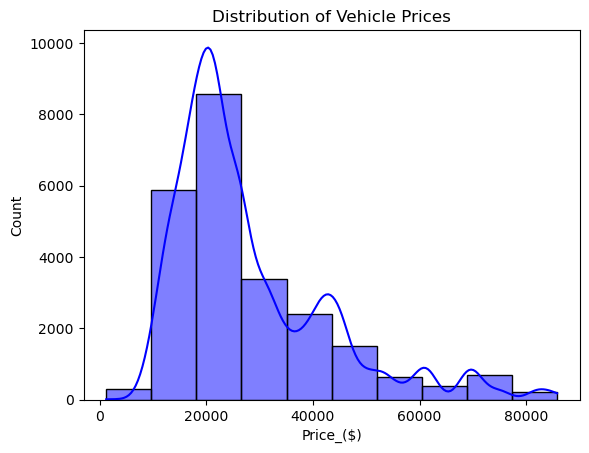

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=car, x='Price_($)', bins=10, kde=True, color='blue')
plt.title('Distribution of Vehicle Prices')
plt.show()

/var/folders/0g/5m9fzrnn1sz871_pvbsf70v40000gn/T/ipykernel_4668/3348272618.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=car, x='Body_Style', y='Price_($)', palette='viridis')


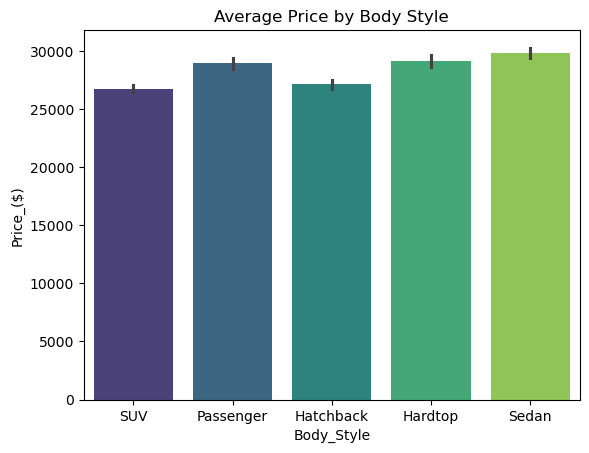

In [8]:
sns.barplot(data=car, x='Body_Style', y='Price_($)', palette='viridis')
plt.title('Average Price by Body Style')
plt.show()

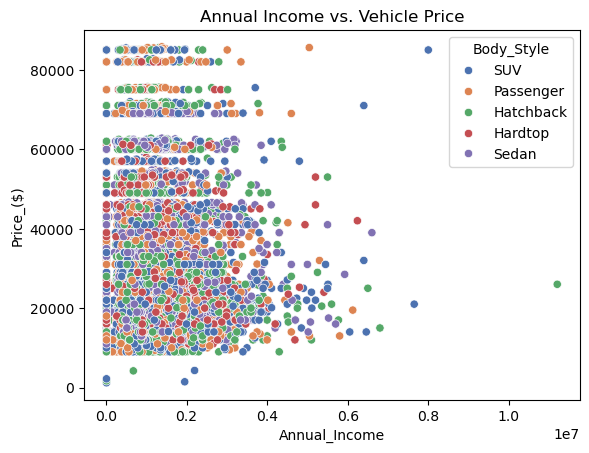

In [9]:
sns.scatterplot(data=car, x='Annual_Income', y='Price_($)', hue='Body_Style', palette='deep')
plt.title('Annual Income vs. Vehicle Price')
plt.show()

/var/folders/0g/5m9fzrnn1sz871_pvbsf70v40000gn/T/ipykernel_4668/1769888182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car, x='Dealer_Region', palette='pastel')


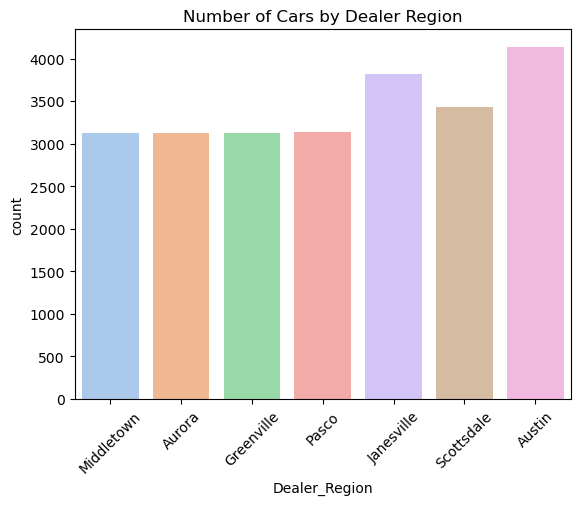

In [10]:
sns.countplot(data=car, x='Dealer_Region', palette='pastel')
plt.title('Number of Cars by Dealer Region')
plt.xticks(rotation=45)
plt.show()

/var/folders/0g/5m9fzrnn1sz871_pvbsf70v40000gn/T/ipykernel_4668/2917223578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car, x='Transmission', y='Price_($)', palette='muted')


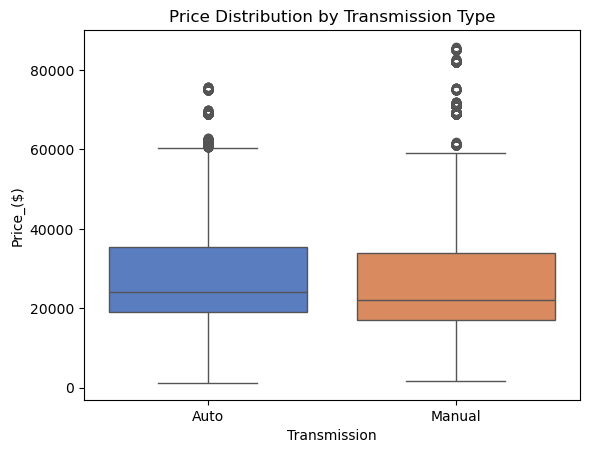

In [11]:
sns.boxplot(data=car, x='Transmission', y='Price_($)', palette='muted')
plt.title('Price Distribution by Transmission Type')
plt.show()

<Figure size 1200x600 with 0 Axes>

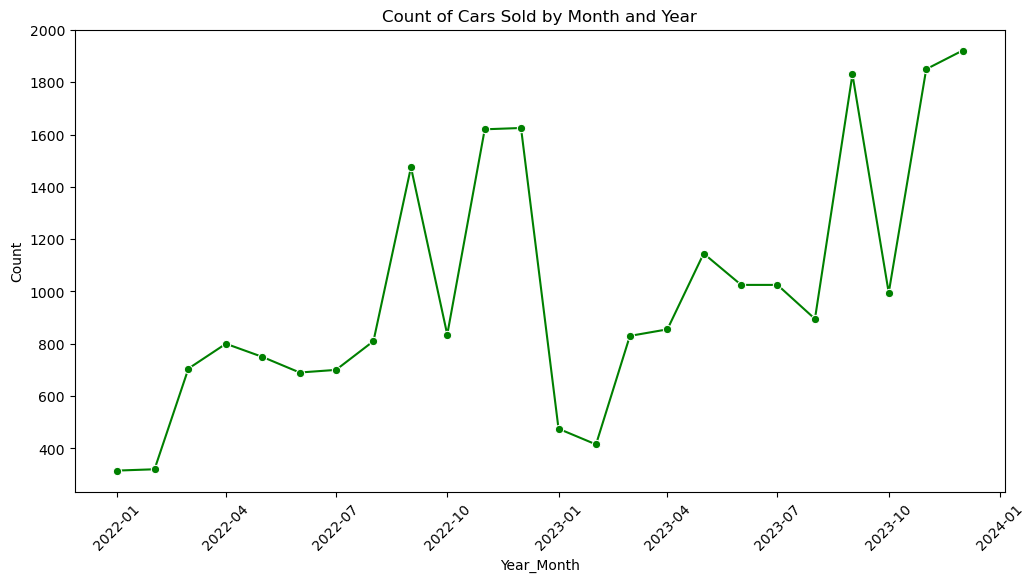

In [12]:
# Set figure size
plt.figure(figsize=(12, 6))

# Convert the 'Date' column to datetime
car['Date'] = pd.to_datetime(car['Date'])

# Group by Year and Month
car['Year_Month'] = car['Date'].dt.to_period('M')  # Extract Year and Month

# Group by the new 'Year_Month' column
df_grouped = car.groupby('Year_Month').size().reset_index(name='Count')

# Convert 'Year_Month' back to datetime for plotting
df_grouped['Year_Month'] = df_grouped['Year_Month'].dt.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Year_Month', y='Count', marker='o', color='green')
plt.title('Count of Cars Sold by Month and Year')
plt.xticks(rotation=45)
plt.show()

### 3. Data Preprocessing

In [13]:
car = car.drop(['Date', 'Year_Month', 'Model'], axis=1)
car

,Gender,Annual_Income,Company,Transmission,Color,Price_($),Body_Style,Dealer_Region
0,Male,13500,Ford,Auto,Black,26000,SUV,Middletown
1,Male,1480000,Dodge,Auto,Black,19000,SUV,Aurora
2,Male,1035000,Cadillac,Manual,Red,31500,Passenger,Greenville
3,Male,13500,Toyota,Manual,Pale White,14000,SUV,Pasco
4,Male,1465000,Acura,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...
23901,Male,13500,Plymouth,Manual,Red,12000,Passenger,Pasco
23902,Female,900000,Chevrolet,Auto,Black,16000,Hardtop,Middletown
23903,Male,705000,BMW,Manual,Red,21000,Sedan,Scottsdale
23904,Male,13500,Chevrolet,Auto,Black,31000,Passenger,Austin


In [14]:
# Define features and target variable
X = car.drop('Body_Style', axis=1)
y = car['Body_Style']

# Preprocessing pipeline: One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Gender', 'Company', 'Transmission', 'Color', 'Dealer_Region']),
        ('num', StandardScaler(), ['Annual_Income', 'Price_($)'])  # Keep numerical columns as is
    ])

# Create a pipeline that first preprocesses the data, then applies the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Create a pipeline that first preprocesses the data, then applies the classifier
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])


# Create another pipeline with a different classifier
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Create a pipeline that first preprocesses the data, then applies the XGBoost classifier
pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

### 4. Split data to train and test sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train set and 20% test set

In [16]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(4782,)

### 5. Model Training & Results

In [17]:
# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7749895441237976
              precision    recall  f1-score   support

     Hardtop       0.52      0.51      0.51       572
   Hatchback       0.77      0.78      0.77      1200
   Passenger       0.86      0.85      0.86       804
         SUV       0.78      0.78      0.78      1304
       Sedan       0.87      0.87      0.87       902

    accuracy                           0.77      4782
   macro avg       0.76      0.76      0.76      4782
weighted avg       0.77      0.77      0.77      4782



In [18]:
# Train the model
pipeline1.fit(X_train, y_train)

# Predictions
y_pred = pipeline1.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5882475951484735
              precision    recall  f1-score   support

     Hardtop       0.48      0.29      0.36       572
   Hatchback       0.54      0.58      0.56      1200
   Passenger       0.66      0.54      0.59       804
         SUV       0.58      0.70      0.63      1304
       Sedan       0.67      0.67      0.67       902

    accuracy                           0.59      4782
   macro avg       0.58      0.56      0.56      4782
weighted avg       0.59      0.59      0.58      4782



In [19]:
# Train the model
pipeline2.fit(X_train, y_train)

# Predictions
y_pred = pipeline2.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5466332078628189
              precision    recall  f1-score   support

     Hardtop       0.38      0.45      0.41       572
   Hatchback       0.51      0.60      0.55      1200
   Passenger       0.59      0.55      0.57       804
         SUV       0.59      0.52      0.55      1304
       Sedan       0.65      0.57      0.61       902

    accuracy                           0.55      4782
   macro avg       0.54      0.54      0.54      4782
weighted avg       0.56      0.55      0.55      4782



In [21]:
from sklearn.preprocessing import LabelEncoder
yOne = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, yOne, test_size=0.2, random_state=42) # 80% train set and 20% test set

In [23]:
# Train the model
pipeline3.fit(X_train, y_train)

# Predictions
y_pred = pipeline3.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8385612714345462
              precision    recall  f1-score   support

           0       0.57      0.76      0.65       572
           1       0.88      0.80      0.84      1200
           2       0.95      0.92      0.93       804
           3       0.85      0.79      0.82      1304
           4       0.90      0.93      0.92       902

    accuracy                           0.84      4782
   macro avg       0.83      0.84      0.83      4782
weighted avg       0.85      0.84      0.84      4782



## Next Steps

- Add validation split as well (75% training, 10% validation, 15% testing)
- Attempt XGboosting
- Explore hyperparameter tuning with gridsearch